In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('StudentsPerformance.csv')


## EDA

1. Understanding the data - variables

In [10]:
# see the overview of the colimns
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# checking the last 5 rows
data .tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
#check no. of rows and columns
data.shape

(1000, 8)

In [13]:
# check the statistical summary of  numericaland  categorical columns.
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
# check columns
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
#check for unique values in our columns
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [18]:
#check for unique values per column
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [25]:
print("\nUnique values in lunch:", data['lunch'].unique())


Unique values in lunch: ['standard' 'free/reduced']


In [26]:
print(f"\nUnique values in lunch: {data['lunch'].unique()}")


Unique values in lunch: ['standard' 'free/reduced']


2. Cleaning Data

In [27]:
# check for null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
# droping redudant data, the data we do not need for our analysis or modelling
#the axis parameter tells whether you’re dropping rows or columns.
# axis=0 → operate on rows (default), xis=1 → operate on columns.
df = data.drop(['race/ethnicity','parental level of education'], axis=1)

In [30]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [36]:
df.dtypes

gender                     object
lunch                      object
test preparation course    object
math score                  int64
reading score               int64
writing score               int64
dtype: object

##### Always check the distribution before checking for outliers

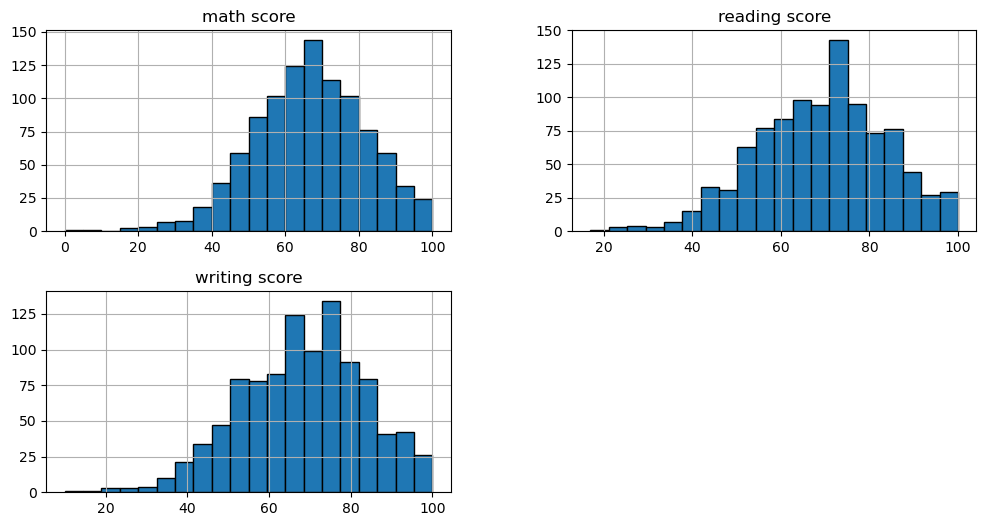

In [42]:
# To check distribution overview for all numeric columns
df.hist(bins=20, figsize=(12,6), edgecolor='black')
plt.title(" Distribution")
plt.show()

2. Use KDE curve to check if scores follow a normal distribution (bell curve).

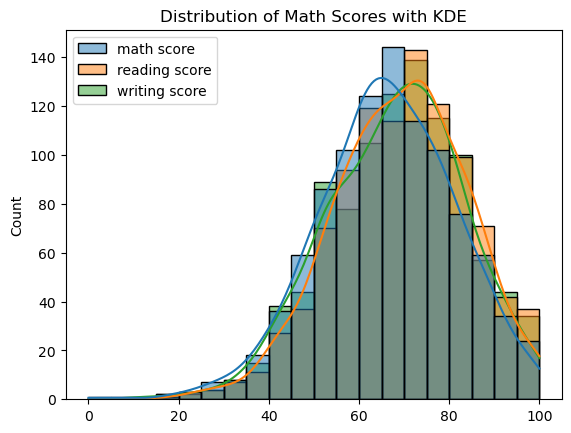

In [43]:
sns.histplot(df, bins=20, kde=True)
plt.title("Distribution of Math Scores with KDE")
plt.show()

3. BoxPLot


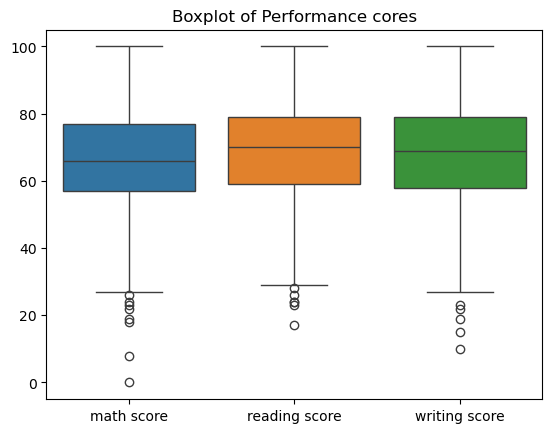

In [45]:
sns.boxplot(df)
plt.title("Boxplot of Performance cores")
plt.show()

4. Use Histogram

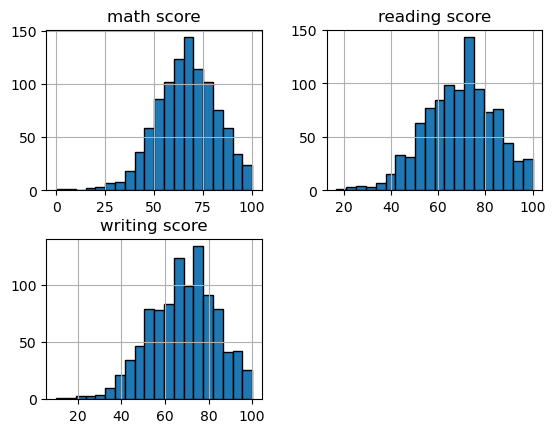

In [47]:
df.hist(bins=20, edgecolor='black')
plt.title("Distribution of Performance cores")
plt.xlabel("score")
plt.ylabel("Frequency")
plt.show()

In [31]:
#check for outliers
#Outliers are data points that are very different from the rest of the values in your dataset
# They are values that are much higher or much lower than what you would normally expect.

In [ ]:
Methods of checking for outliers:
1. Box Plot- Outliers show up as dots outside the “whiskers”.
2. Scatter plot-Helps see unusual points in relation to others.
3. Using statistics: 
  a. Z-score method- Z-score tells how many standard deviations away a value is from the mean. If If |Z| > 3, it’s often considered an outlier.
  b. IQR method (Interquartile Range)- Find Q1 (25%) and Q3 (75%). IQR = Q3 − Q1.
     Any value below Q1 − 1.5×IQR or above Q3 + 1.5×IQR is an outlier.

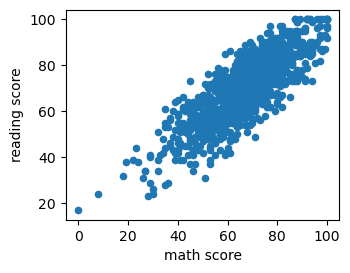

In [35]:
#Use scatter → when comparing two columns.
# needs specified variables for x and y i.e
df.plot(kind='scatter', x= 'math score', y = 'reading score',subplots=True, layout=(2,3), figsize=(12,6))

plt.show()

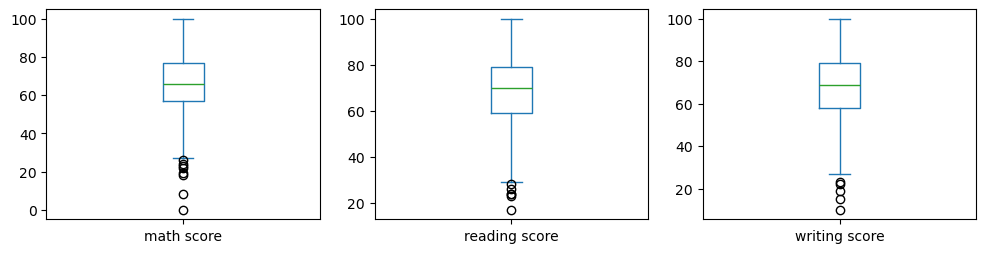

In [34]:
import matplotlib.pyplot as plt
# to scan for outliers across all numeric columns, use boxplots
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,6))
plt.show()


In [38]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number')

# Loop through each numeric column
for col in numeric_columns.columns:
    Q1 = numeric_columns[col].quantile(0.25)
    Q3 = numeric_columns[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = numeric_columns[(numeric_columns[col] < lower_limit) | (numeric_columns[col] > upper_limit)]
    print(f"\nOutliers in {col}:")
    print(outliers[col])


Outliers in math score:
17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

Outliers in reading score:
59     17
76     26
211    28
327    23
596    24
980    24
Name: reading score, dtype: int64

Outliers in writing score:
59     10
76     22
327    19
596    15
980    23
Name: writing score, dtype: int64


In [40]:
# z-score
from scipy import stats

numeric_columns = df.select_dtypes(include='number')

# Loop through each numeric column
for col in numeric_columns.columns:
    z = np.abs(stats.zscore(numeric_columns[col]))
    outliers = numeric_columns[z > 3]
    print(f"\nOutliers in {col}:")
    print(outliers[col])


Outliers in math score:
17     18
59      0
787    19
980     8
Name: math score, dtype: int64

Outliers in reading score:
59     17
327    23
596    24
980    24
Name: reading score, dtype: int64

Outliers in writing score:
59     10
76     22
327    19
596    15
Name: writing score, dtype: int64


Interpretation:
1. Students with very low math scores (0, 8, 18, 19)
2. Extremely low reading scores (17–24), while most students likely scored much higher.
3. Very low writing scores (10–22).

These students consistently have unusually low scores across multiple subjects.
For example:
- Student 59 → flagged as an outlier in all three subjects.
- Student 980 → flagged in math and reading.
- Students 327, 596 → flagged in reading and writing.

The Z-score tells you how far a data point is from the mean, measured in standard deviations.
Formula: Z= (x-u)/𝜎
Where:
   x = the value
   μ = the mean of the column
   σ = the standard deviation of the column

Say test scores have:
   Mean = 70
   Standard deviation = 10

This means:
- A score of 70 → Z = (70–70)/10 = 0 → exactly average

- A score of 80 → Z = (80–70)/10 = +1 → 1 std above average

- A score of 50 → Z = (50–70)/10 = -2 → 2 std below average

Which method to use to check for outliers:
 1. Z-score method
    Good if the data is roughly normally distributed (bell-shaped).
2. IQR method
   Works well even if the data is skewed.
   Most commonly used in EDA because it’s simple and robust.
Nb: If you’re unsure → start with IQR.

What to do if you find outliers:
- Keep them → if they are real and meaningful.

  Example: A student scored 100/100 → rare, but valid.

- Remove them → if they’re clearly mistakes.

  Example: Age recorded as 200 years.

- Cap or transform them → if they distort the analysis but are not errors.

  Example: Replace extreme values with upper/lower limits

In this case, it's possible to have students scoring the lowest in various areas, so we keep our outliers.

3. Relationship Analysis

In [50]:
# correlation- Heatmap to see numeric columns relationship
correlation= df.corr(numeric_only=True)

<Axes: >

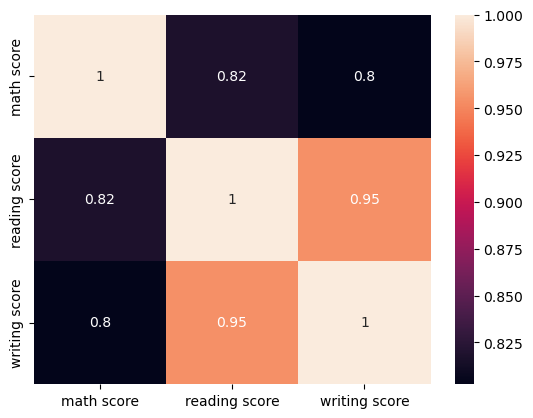

In [54]:
#plot the heatmap
sns.heatmap(correlation,annot=True)


Interpretation:

- Math vs Reading (0.82) → There’s a strong positive relationship. Students who do well in math also tend to do well in reading.

- Math vs Writing (0.80) → Also a strong positive relationship. Good math students usually score well in writing too.

- Reading vs Writing (0.95) → This is the strongest correlation. Students who score high in reading almost always score high in writing.

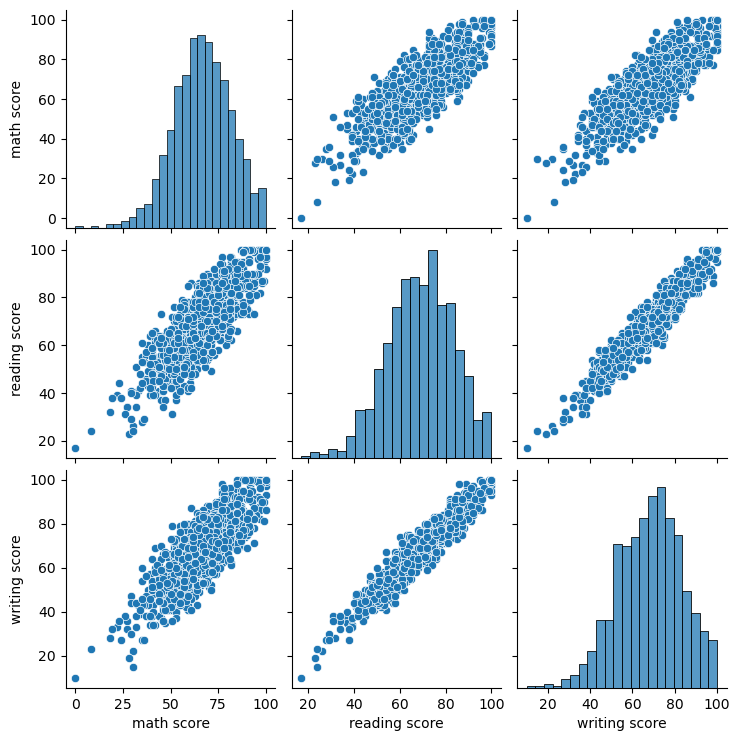

In [55]:
#pairplot
sns.pairplot(df)

#### Findings:


1. Histograms
Each diagonal shows the distribution of scores for that subject.
i.e:

- Math, Reading, and Writing scores are mostly between 40 and 100.

- The peaks (highest bars) show most students scored around the 70–80 range.

- The shapes look fairly normal (bell-shaped), so scores are spread fairly evenly around the middle.


2. Scatter plots
These show the relationship between two subjects:

- Math vs Reading (top-right & bottom-left scatterplots): The dots form an upward slope meaning students who do well in math tend to do well in reading.

- Math vs Writing: Good math students also tend to write well.

- Reading vs Writing: This shows the tightest line. Students’ reading and writing scores are very closely linked.
    This indicates that if you’re strong in reading, you’re almost always strong in writing.

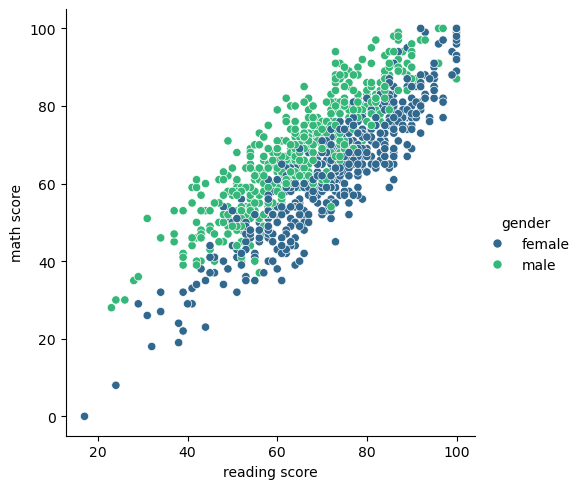

In [67]:
#relplot creates statistical visualizations that show how two or more variables relate to each other.
sns.relplot(df, x="reading score", y="math score", kind="scatter",hue="gender",palette="viridis")

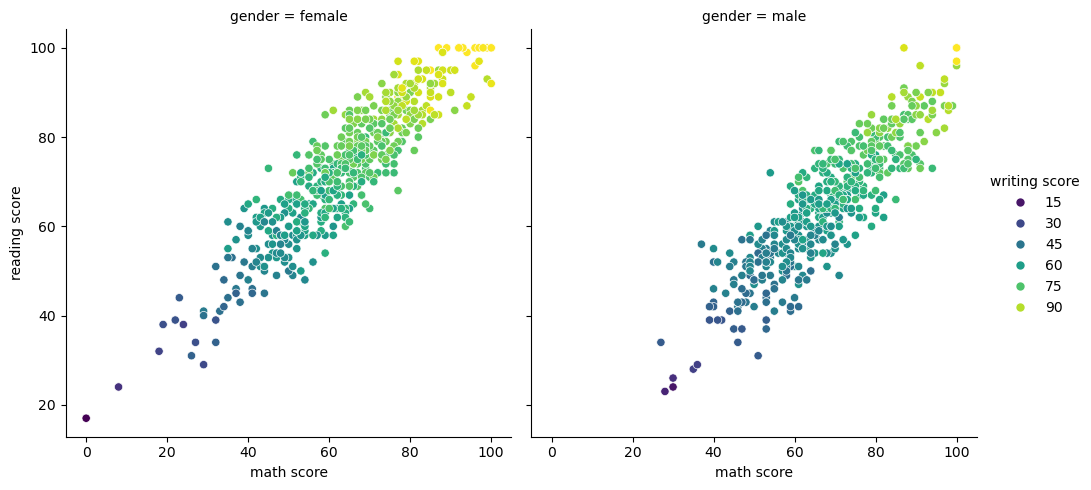

In [66]:
# Separate plots for each gender
sns.relplot(df, x="math score", y="reading score", hue="writing score", col="gender", kind="scatter",palette="viridis")

This shows that if writing scores are:
- lighter = lower writing scores
- darker = higher writing scores

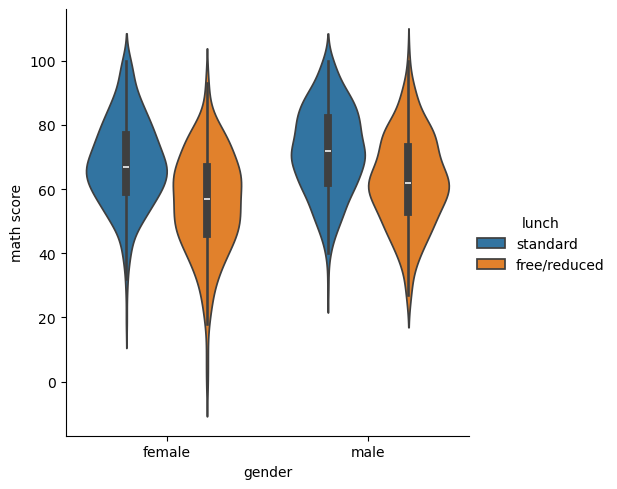

In [72]:
# Shows distribution shape
sns.catplot(df, x="gender", y="math score", kind="violin", hue="lunch")

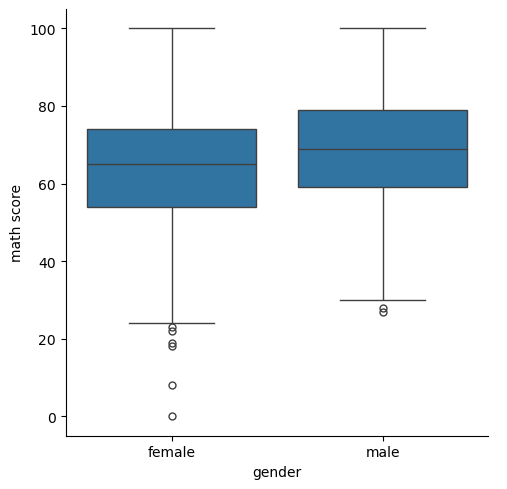

In [69]:
# Shows quartiles, median, outliers
sns.catplot(df, x="gender", y="math score", kind="box")

<Axes: xlabel='math score', ylabel='Count'>

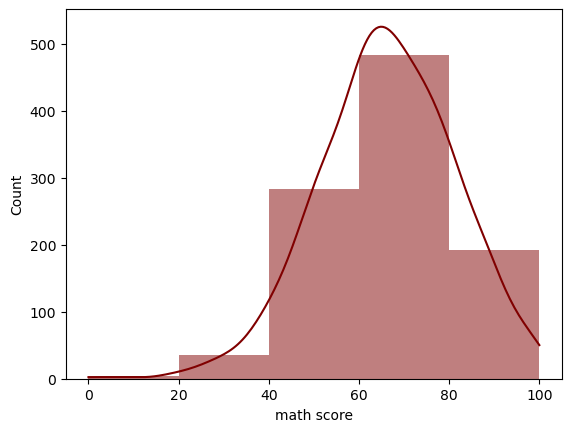

In [86]:
sns.histplot(df, x="math score", bins=5, kde=True,color="maroon", edgecolor=None)